In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [74]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [75]:
display(customer_df.shape)

(9134, 24)

In [76]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [77]:
cols = [i.replace(" ","_") for i in customer_df.columns]
customer_df.columns = cols

cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower())

customer_df.columns = cols

customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [78]:
customer_df = customer_df.rename(columns={'employmentstatus':'employment_status'})

In [79]:
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [80]:
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'],errors='coerce')
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [81]:
numericals = customer_df.select_dtypes(np.number)
categoricals = customer_df.select_dtypes(np.object)

numericals.dtypes
numericals.nunique()

def function(x):
    if len(x.value_counts())> 1000:
        return 'continuous'
    else:
        return 'discrete'

numericals.apply(function)


customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

customer_lifetime_value          continuous
income                           continuous
monthly_premium_auto               discrete
months_since_last_claim            discrete
months_since_policy_inception      discrete
number_of_open_complaints          discrete
number_of_policies                 discrete
total_claim_amount               continuous
dtype: object

In [82]:
discrete_df = numericals.drop(['customer_lifetime_value','income','total_claim_amount'], axis=1)
discrete_df.head()
continuous_df = numericals.loc[:,['customer_lifetime_value','income','total_claim_amount']]
continuous_df.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


<AxesSubplot:>

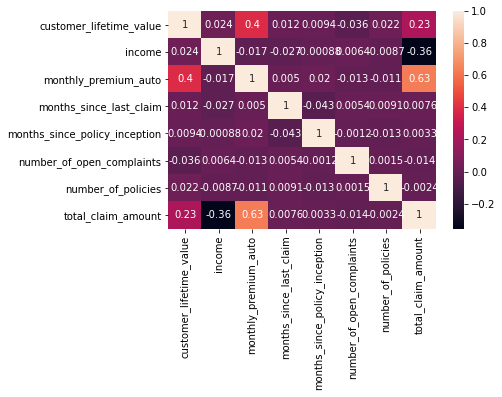

In [83]:
correlations_matrix = numericals.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [84]:
# With the correlation matrix, we can observe that both the total claim amount and the monthly premium auto are highly correlated . It is also important to point out that it exist an important correlation of these two values with the customer lifetime value.
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

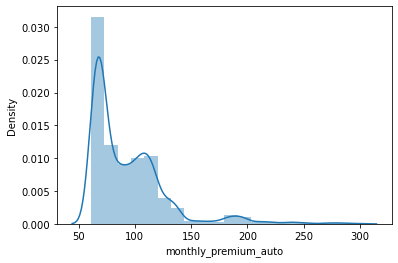

<AxesSubplot:xlabel='months_since_last_claim', ylabel='Density'>

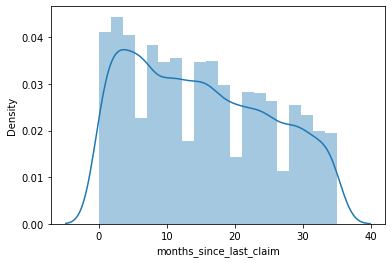

<AxesSubplot:xlabel='months_since_policy_inception', ylabel='Density'>

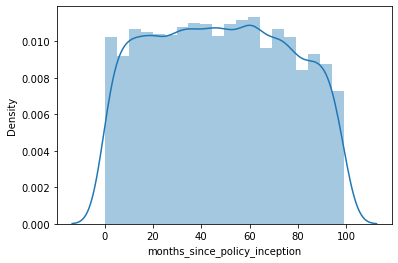

<AxesSubplot:xlabel='number_of_open_complaints', ylabel='Density'>

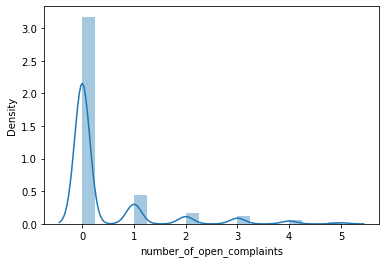

<AxesSubplot:xlabel='number_of_policies', ylabel='Density'>

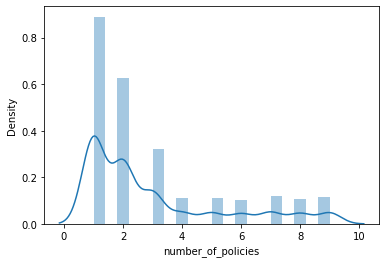

In [86]:
for i in range(len(discrete_df.columns)):
    sns.distplot(discrete_df.iloc[:,i], bins=20)
    plt.show()

In [87]:
# with discrete values, it seems that the fact that they are related to strict values makes the data to more fixed.

<AxesSubplot:xlabel='customer_lifetime_value'>

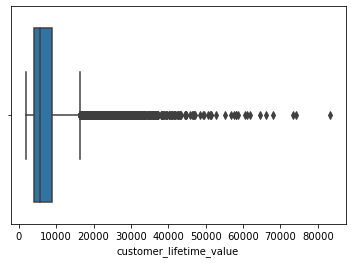

<AxesSubplot:xlabel='income'>

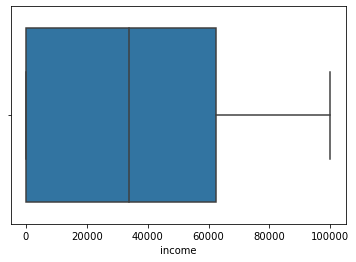

<AxesSubplot:xlabel='total_claim_amount'>

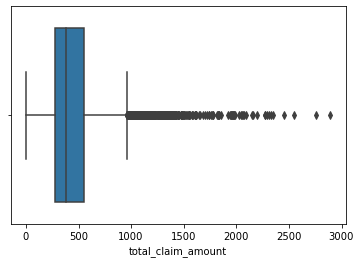

In [88]:
for i in range(len(continuous_df.columns)):
    sns.boxplot(continuous_df.iloc[:,i])
    plt.show()

In [89]:
#after checking possible outliers, we have finally decided not to drop them.
# we are trying to reset the name of some columns using the cut function given by pandas

number_complaints= customer_df['number_of_open_complaints'].value_counts()
number_complaints

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

Not complainer         7252
Low complainer         1011
Medium complainer       374
Moderate complainer     292
High complainer         149
Super complainer         56
Name: number_of_open_complaints, dtype: int64

<AxesSubplot:>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

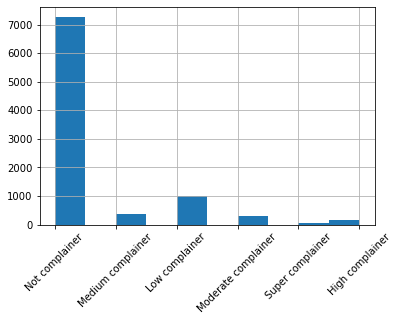

In [90]:
ic_labels = ['Not complainer', 'Low complainer','Medium complainer','Moderate complainer', 'High complainer','Super complainer']
customer_df['number_of_open_complaints'] = pd.cut(customer_df['number_of_open_complaints'],6,labels=ic_labels)
customer_df['number_of_open_complaints'].value_counts()
customer_df['number_of_open_complaints'].hist()
plt.xticks(rotation = 45)
plt.show()

In [91]:
customer_df.isna().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employment_status                0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [92]:
categoricals.dtypes
#after checking possible incorrections in the categorical data(with value counts and unique values) we determine that there is no need to clean the categorical data

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [93]:
categoricals.sample(5)

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
1394,MF18493,California,Yes,Basic,College,Unemployed,M,Suburban,Divorced,Personal Auto,Personal L1,Offer1,Agent,Two-Door Car,Medsize
5700,PD30266,California,No,Extended,College,Employed,F,Urban,Married,Special Auto,Special L1,Offer1,Branch,SUV,Medsize
5529,EV39201,California,Yes,Extended,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
5364,GB39602,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L1,Offer1,Call Center,Sports Car,Medsize
7661,MV26494,California,No,Extended,College,Unemployed,M,Urban,Married,Personal Auto,Personal L3,Offer4,Web,Four-Door Car,Medsize


In [94]:
categoricals1= categoricals.set_index('customer')
categoricals1.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### 13. Open the categoricals variable we created before.

In [95]:
categoricals= categoricals.drop(['customer'], axis=1)

#### 14. Plot all the categorical variables with the proper plot. What can you see?

<AxesSubplot:xlabel='state', ylabel='count'>

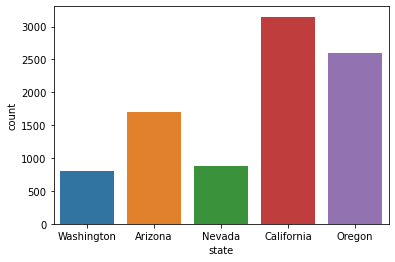

<AxesSubplot:xlabel='response', ylabel='count'>

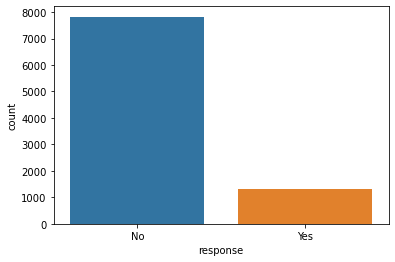

<AxesSubplot:xlabel='coverage', ylabel='count'>

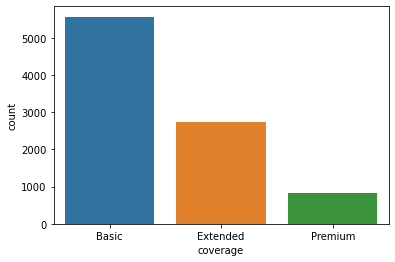

<AxesSubplot:xlabel='education', ylabel='count'>

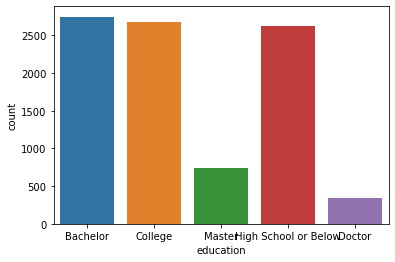

<AxesSubplot:xlabel='employment_status', ylabel='count'>

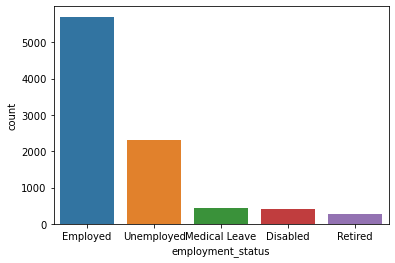

<AxesSubplot:xlabel='gender', ylabel='count'>

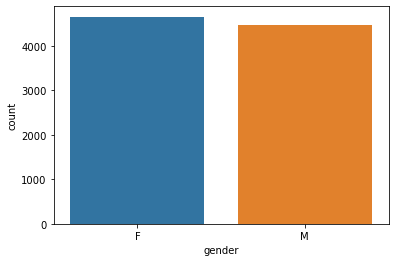

<AxesSubplot:xlabel='location_code', ylabel='count'>

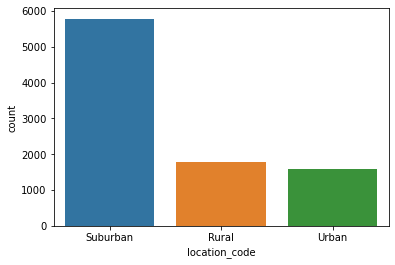

<AxesSubplot:xlabel='marital_status', ylabel='count'>

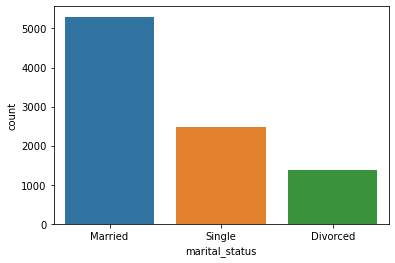

<AxesSubplot:xlabel='policy_type', ylabel='count'>

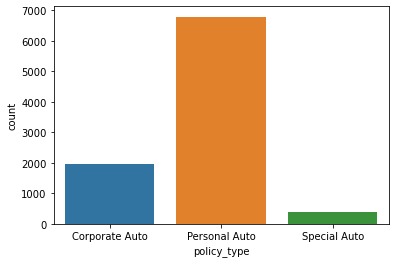

<AxesSubplot:xlabel='policy', ylabel='count'>

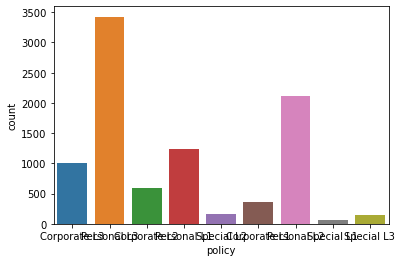

<AxesSubplot:xlabel='renew_offer_type', ylabel='count'>

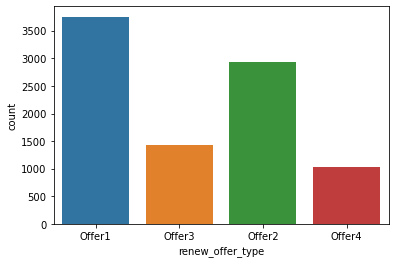

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

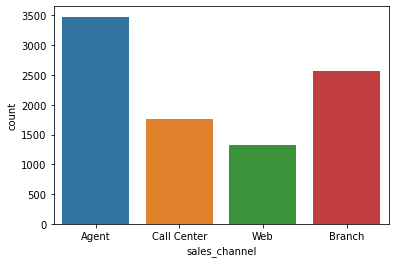

<AxesSubplot:xlabel='vehicle_class', ylabel='count'>

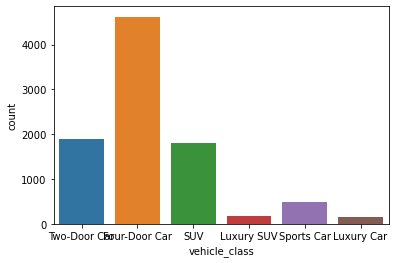

<AxesSubplot:xlabel='vehicle_size', ylabel='count'>

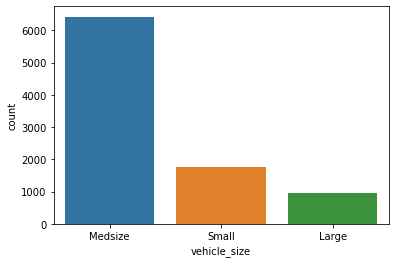

In [96]:
for i in range(len(categoricals.columns)):
        sns.countplot(categoricals.iloc[:,i])
        plt.show()

#### 15. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [97]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints              category
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [98]:
data_crosstab= pd.crosstab(categoricals['employment_status'],categoricals['vehicle_size'],margins=False)
data_crosstab

vehicle_size,Large,Medsize,Small
employment_status,,,
Disabled,48,267,90
Employed,555,4054,1089
Medical Leave,50,291,91
Retired,33,215,34
Unemployed,260,1597,460


In [99]:
import scipy.stats as st
st.chi2_contingency(data_crosstab)

(20.618963656954694,
 0.008231535750894862,
 8,
 array([[  41.94547843,  284.83906284,   78.21545873],
        [ 590.13663236, 4007.43945697, 1100.42391066],
        [  44.74184366,  303.8283337 ,   83.42982264],
        [  29.20648128,  198.3323845 ,   54.46113422],
        [ 239.96956427, 1629.56076199,  447.46967375]]))

In [100]:
data_crosstab2= pd.crosstab(categoricals['employment_status'],categoricals['gender'],margins=False)
data_crosstab

vehicle_size,Large,Medsize,Small
employment_status,,,
Disabled,48,267,90
Employed,555,4054,1089
Medical Leave,50,291,91
Retired,33,215,34
Unemployed,260,1597,460


In [101]:
st.chi2_contingency(data_crosstab2)

(22.21612793202471,
 0.00018151136449675047,
 4,
 array([[ 206.53492446,  198.46507554],
        [2905.76790015, 2792.23209985],
        [ 220.30391942,  211.69608058],
        [ 143.80950296,  138.19049704],
        [1181.58375301, 1135.41624699]]))

In [102]:
data_crosstab3= pd.crosstab(categoricals['marital_status'],categoricals['policy'],margins=False)
data_crosstab3

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
marital_status,,,,,,,,,
Divorced,52,82,177,185,300,528,11,16,18
Married,216,349,562,725,1227,1995,41,104,79
Single,91,164,275,330,595,903,14,44,51


In [103]:
st.chi2_contingency(data_crosstab3)

(19.004527174958604,
 0.26842848613787207,
 16,
 array([[  53.80676593,   89.17834465,  151.97788483,  185.85066783,
          318.04444931,  513.48740968,    9.89205168,   24.58024962,
           22.18217648],
        [ 208.23100504,  345.11823954,  588.15108386,  719.23801182,
         1230.82504927, 1987.18502299,   38.28202321,   95.12502737,
           85.8445369 ],
        [  96.96222903,  160.70341581,  273.87103131,  334.91132034,
          573.13050142,  925.32756733,   17.82592511,   44.29472301,
           39.97328662]]))

In [104]:
data_crosstab4 = pd.crosstab(categoricals['employment_status'], categoricals['vehicle_size'], margins = False)
data_crosstab4

vehicle_size,Large,Medsize,Small
employment_status,,,
Disabled,48,267,90
Employed,555,4054,1089
Medical Leave,50,291,91
Retired,33,215,34
Unemployed,260,1597,460


In [105]:
st.chi2_contingency(data_crosstab4)

(20.618963656954694,
 0.008231535750894862,
 8,
 array([[  41.94547843,  284.83906284,   78.21545873],
        [ 590.13663236, 4007.43945697, 1100.42391066],
        [  44.74184366,  303.8283337 ,   83.42982264],
        [  29.20648128,  198.3323845 ,   54.46113422],
        [ 239.96956427, 1629.56076199,  447.46967375]]))

In [106]:
data_crosstab5 = pd.crosstab(categoricals['location_code'], categoricals['education'], margins = False)
data_crosstab5

education,Bachelor,College,Doctor,High School or Below,Master
location_code,,,,,
Rural,542,524,102,368,237
Suburban,1704,1683,157,1917,318
Urban,502,474,83,337,186


In [107]:
st.chi2_contingency(data_crosstab5)

(291.6886097946548,
 2.4160389458833635e-58,
 8,
 array([[ 533.41405737,  520.4086928 ,   66.38559229,  508.95620758,
          143.83544997],
        [1738.63499015, 1696.24469017,  216.3803372 , 1658.91591855,
          468.82406394],
        [ 475.95095249,  464.34661704,   59.23407051,  454.12787388,
          128.3404861 ]]))

In [108]:
data_crosstab6 = pd.crosstab(categoricals['renew_offer_type'], categoricals['response'], margins = False)
data_crosstab6

response,No,Yes
renew_offer_type,,
Offer1,3158,594
Offer2,2242,684
Offer3,1402,30
Offer4,1024,0


In [109]:
st.chi2_contingency(data_crosstab6)

(548.1644514293835,
 1.73695030654266e-118,
 3,
 array([[3214.70899934,  537.29100066],
        [2506.99321217,  419.00678783],
        [1226.9358441 ,  205.0641559 ],
        [ 877.36194438,  146.63805562]]))

In [110]:
data_crosstab7 = pd.crosstab(categoricals['policy'], categoricals['vehicle_class'], margins = False)
data_crosstab7

vehicle_class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
policy,,,,,,
Corporate L1,193,7,7,69,18,65
Corporate L2,302,15,12,111,27,128
Corporate L3,496,18,13,213,59,215
Personal L1,640,22,33,218,70,257
Personal L2,1051,28,40,439,112,452
Personal L3,1742,66,73,672,173,700
Special L1,36,1,0,15,3,11
Special L2,89,2,5,26,15,27
Special L3,72,4,1,33,7,31


In [111]:
st.chi2_contingency(data_crosstab7)

(35.60937084495786,
 0.6681348345629067,
 40,
 array([[1.81622400e+02, 6.40650317e+00, 7.23188088e+00, 7.05894460e+01,
         1.90229910e+01, 7.41267791e+01],
        [3.01017626e+02, 1.06180206e+01, 1.19859864e+01, 1.16993650e+02,
         3.15283556e+01, 1.22856361e+02],
        [5.12994745e+02, 1.80952485e+01, 2.04265382e+01, 1.99380775e+02,
         5.37306766e+01, 2.09372017e+02],
        [6.27330852e+02, 2.21283118e+01, 2.49791986e+01, 2.43818699e+02,
         6.57061528e+01, 2.56036786e+02],
        [1.07354522e+03, 3.78679658e+01, 4.27466608e+01, 4.17244581e+02,
         1.12442303e+02, 4.38153273e+02],
        [1.73325443e+03, 6.11383841e+01, 6.90151084e+01, 6.73647471e+02,
         1.81539742e+02, 7.07404861e+02],
        [3.33901905e+01, 1.17779724e+00, 1.32953799e+00, 1.29774469e+01,
         3.49726297e+00, 1.36277644e+01],
        [8.29695643e+01, 2.92664769e+00, 3.30370046e+00, 3.22469893e+01,
         8.69016860e+00, 3.38629297e+01],
        [7.48749726e+01, 2.6411210

In [112]:
data_crosstab8 = pd.crosstab(categoricals['sales_channel'], categoricals['policy_type'], margins = False)
data_crosstab8

policy_type,Corporate Auto,Personal Auto,Special Auto
sales_channel,,,
Agent,752,2575,150
Branch,553,1906,108
Call Center,378,1329,58
Web,285,978,62


In [113]:
st.chi2_contingency(data_crosstab8)

(4.655398517151223,
 0.5887070133364456,
 6,
 array([[ 749.14998905, 2583.9583972 ,  143.89161375],
        [ 553.08254872, 1907.68513247,  106.23231881],
        [ 380.28465076, 1311.67287059,   73.04247865],
        [ 285.48281147,  984.68359974,   54.83358879]]))

In [114]:
customer_df = customer_df.drop(['marital_status','vehicle_class','policy_type'], axis=1)
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,69,32,5,Not complainer,1,Corporate L3,Offer1,Agent,384.811147,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,94,13,42,Not complainer,8,Personal L3,Offer3,Agent,1131.464935,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,108,18,38,Not complainer,2,Personal L3,Offer1,Agent,566.472247,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,106,18,65,Not complainer,7,Corporate L2,Offer1,Call Center,529.881344,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,73,12,44,Not complainer,1,Personal L1,Offer1,Agent,138.130879,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,73,18,89,Not complainer,2,Personal L1,Offer2,Web,198.234764,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,79,14,28,Not complainer,1,Corporate L3,Offer1,Branch,379.200000,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,85,9,37,Moderate complainer,2,Corporate L2,Offer1,Branch,790.784983,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,96,34,3,Not complainer,3,Personal L2,Offer3,Branch,691.200000,Large


In [115]:
# in this case,we have decided to drop those columns with an high interdependency

#### 16. Plot time variable. Can you extract something from it?

In [116]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

(array([14975., 14982., 14989., 14996., 15006., 15013., 15020., 15027.,
        15034.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Total Claim Amount per Date')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Total Claim Amount')

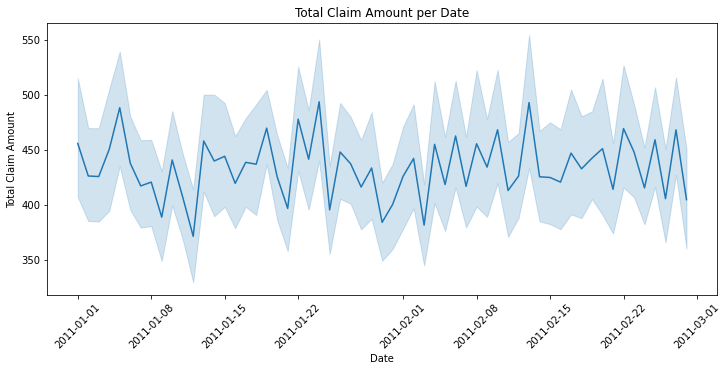

In [117]:
plt.figure(figsize = (12,5))
sns.lineplot('effective_to_date','total_claim_amount',data=customer_df)
plt.xticks(rotation=45)
plt.title("Total Claim Amount per Date")
plt.xlabel("Date")
plt.ylabel("Total Claim Amount")
plt.show()

#### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


<AxesSubplot:xlabel='customer_lifetime_value'>

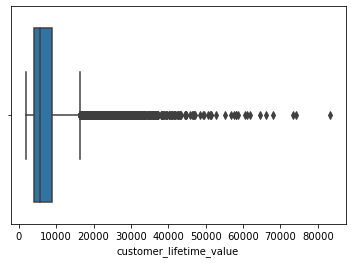

<AxesSubplot:xlabel='income'>

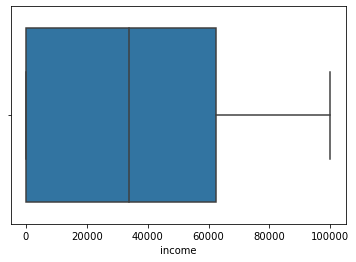

<AxesSubplot:xlabel='monthly_premium_auto'>

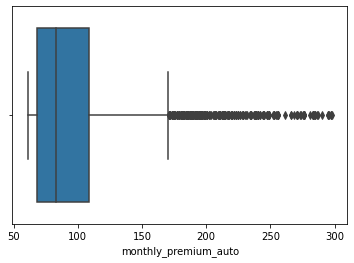

<AxesSubplot:xlabel='months_since_last_claim'>

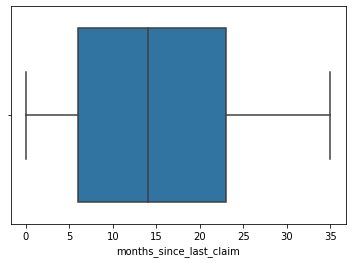

<AxesSubplot:xlabel='months_since_policy_inception'>

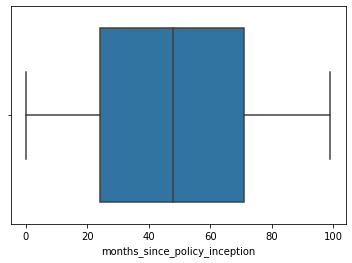

<AxesSubplot:xlabel='number_of_open_complaints'>

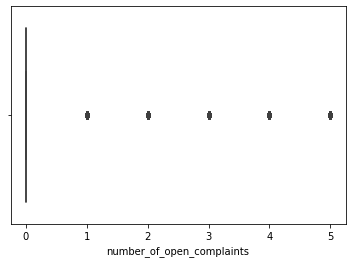

<AxesSubplot:xlabel='number_of_policies'>

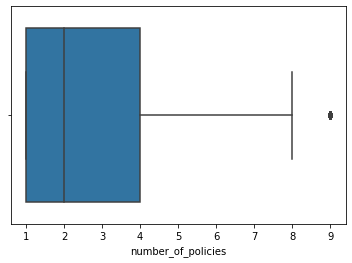

<AxesSubplot:xlabel='total_claim_amount'>

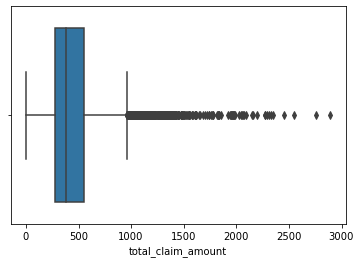

In [118]:
numericals.head()

for i in range(len(numericals.columns)):
    sns.boxplot(numericals.iloc[:,i])
    plt.show()

<AxesSubplot:>

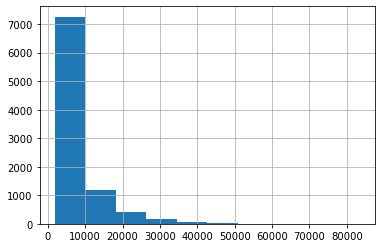

In [119]:
numericals['customer_lifetime_value'].hist()

In [120]:
### in order to remove some outliers (customer lifetime value & monthly premium auto), we have calculated the iqr and drop those values out this iqr.

iqr = np.percentile(numericals['customer_lifetime_value'],75) - np.percentile(numericals['customer_lifetime_value'],25)
upper_limit = np.percentile(numericals['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = numericals[numericals['customer_lifetime_value'] > upper_limit]
len(extraordinary_points)  # THis checks the number of points that will be removed

numericals = numericals[numericals['customer_lifetime_value'] < upper_limit]


16414.039911750002


817

<AxesSubplot:>

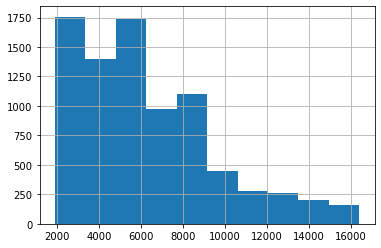

In [121]:
numericals['customer_lifetime_value'].hist()

<AxesSubplot:>

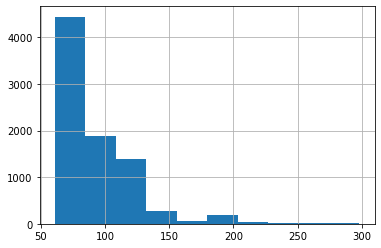

In [122]:
numericals['monthly_premium_auto'].hist()

In [123]:
iqr = np.percentile(numericals['monthly_premium_auto'],75) - np.percentile(numericals['monthly_premium_auto'],25)
upper_limit = np.percentile(numericals['monthly_premium_auto'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = numericals[numericals['monthly_premium_auto'] > upper_limit]
len(extraordinary_points)  # THis checks the number of points that will be removed

numericals = numericals[numericals['monthly_premium_auto'] < upper_limit]


165.5


301

<AxesSubplot:>

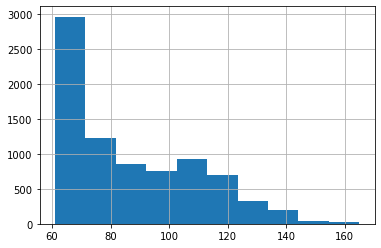

In [124]:
numericals['monthly_premium_auto'].hist()

In [125]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,0,1,541.282007
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


#### 2. Normalize the continuous variables. You can use any one method you want.

In [126]:
y = continuous_df['total_claim_amount']
X = continuous_df.drop(['total_claim_amount'], axis=1)

In [127]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include = np.object)

In [128]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
x_normalized = MinMaxtransformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

(9134, 2)


,customer_lifetime_value,income
0,0.010629,0.562847
1,0.062406,0.000000
2,0.134960,0.487763
3,0.070589,0.000000
4,0.011245,0.438443


#### 4. Encode the categorical variables

In [129]:
y = customer_df['total_claim_amount']
X = customer_df.drop(['total_claim_amount'], axis=1)

In [130]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include = np.object)

In [131]:
categoricals = pd.get_dummies(categoricals)
categoricals

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


#### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [132]:
# We add column ['Effective_To_Date'] to discrete_df removing year of subscription

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date'] = customer_df['effective_to_date'].dt.strftime('%d%m')
customer_df['effective_to_date'] = pd.to_numeric(customer_df['effective_to_date'])
discrete_df['effective_to_date'] = customer_df['effective_to_date'] 
discrete_df


,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date
0,69,32,5,0,1,2402
1,94,13,42,0,8,3101
2,108,18,38,0,2,1902
3,106,18,65,0,7,2001
4,73,12,44,0,1,302
...,...,...,...,...,...,...
9129,73,18,89,0,2,1002
9130,79,14,28,0,1,1202
9131,85,9,37,3,2,602
9132,96,34,3,0,3,302


#### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [133]:
categoricals


,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [134]:
customer_df3 = pd.concat([categoricals, continuous_df, discrete_df],axis=1)

customer_df3

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,vehicle_size_Small,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date
0,0,0,0,0,1,1,0,1,0,0,...,0,2763.519279,56274,384.811147,69,32,5,0,1,2402
1,1,0,0,0,0,1,0,0,1,0,...,0,6979.535903,0,1131.464935,94,13,42,0,8,3101
2,0,0,1,0,0,1,0,0,0,1,...,0,12887.431650,48767,566.472247,108,18,38,0,2,1902
3,0,1,0,0,0,1,0,1,0,0,...,0,7645.861827,0,529.881344,106,18,65,0,7,2001
4,0,0,0,0,1,1,0,1,0,0,...,0,2813.692575,43836,138.130879,73,12,44,0,1,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,1,0,1,0,0,...,0,23405.987980,71941,198.234764,73,18,89,0,2,1002
9130,0,1,0,0,0,0,1,0,1,0,...,0,3096.511217,21604,379.200000,79,14,28,0,1,1202
9131,0,1,0,0,0,1,0,0,1,0,...,0,8163.890428,0,790.784983,85,9,37,3,2,602
9132,0,1,0,0,0,1,0,0,1,0,...,0,7524.442436,21941,691.200000,96,34,3,0,3,302


In [135]:
customer_df3.dtypes

state_Arizona                    uint8
state_California                 uint8
state_Nevada                     uint8
state_Oregon                     uint8
state_Washington                 uint8
                                 ...  
months_since_last_claim          int64
months_since_policy_inception    int64
number_of_open_complaints        int64
number_of_policies               int64
effective_to_date                int64
Length: 66, dtype: object

In [136]:
y= customer_df3['total_claim_amount']
X= customer_df3.drop(['total_claim_amount'], axis=1)

In [137]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X)
X_normalized = MinMaxtransformer.transform(X)
X_normalized = pd.DataFrame(X_normalized,columns=X.columns)
X_normalized

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,vehicle_size_Medsize,vehicle_size_Small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.767000
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,1.000000
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.600333
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.633333
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.067000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.300333
9130,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.367000
9131,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.167000
9132,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.067000


In [138]:
# Splitting and training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.4, random_state=77)

from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

from sklearn.metrics import r2_score
predictions = lm.predict(X_test)
r2_score(y_test, predictions)
print(r2_score)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(mse)

import math
rmse = math.sqrt(mse)
print(rmse)

0.7858808969554273

<function r2_score at 0x7fdf0be72280>
16755.77493650317
129.44409965889975


In [139]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=7)
KNN.fit(X_train, y_train)

score = KNN.score(X_test, y_test)
score

KNeighborsRegressor(n_neighbors=7)

0.6134325441151447

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'k')

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

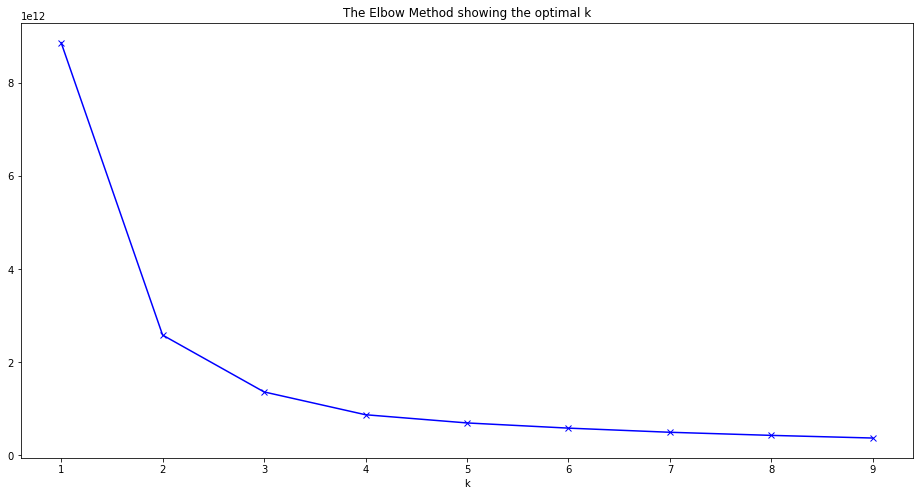

In [140]:
from sklearn.cluster import KMeans

compute = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(customer_df3)
    compute.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, compute, 'bx-')
plt.xlabel('k')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [141]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X_normalized, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y,
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

array([-0.98506347, -7.19854141])

0.4162338898076593

In [142]:
lm = ['LinearRegression','KNeighborsRegressor','MLPRegressor']

def func_train_test(model): 
    if model == 'LinearRegression':
        LR = LR = linear_model.LinearRegression()
        LR.fit(X_train,y_train)
        score = LR.score(X_test, y_test)
        y_pred= LR.predict(X_test)
        return print('R2 score is: ',r2_score(y_pred, y_test),'& score is: ',score)
    elif model == 'KNeighborsRegressor':
        KNN = KNeighborsRegressor(n_neighbors=10)
        KNN.fit(X_train, y_train)
        score = KNN.score(X_test, y_test)
        return print('KNeighborscore is: ',score)
    elif model == 'MLPRegressor':
        regr = MLPRegressor(random_state=25, max_iter=500).fit(X_train, y_train)
        regr.predict(X_test)
        MLPscore = regr.score(X_test, y_test)
        return print('MLPscore is: ',MLPscore)
    else:
        return None